In [1]:
# From dct.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cv2

In [3]:
# https://stackoverflow.com/questions/9777783/suppress-scientific-notation-in-numpy-when-creating-array-from-nested-list
# prevent numpy exponential 
# notation on print, default False
np.set_printoptions(suppress=True)

In [4]:
from IPython.display import Markdown as md

# From https://stackoverflow.com/questions/5466451/how-can-i-print-literal-curly-brace-characters-in-python-string-and-also-use-fo
# https://stackoverflow.com/a/47310524/4162778
def array_to_latex_matrix(arr):
    converted_str = np.array2string(arr, separator=' &', suppress_small=True).replace('[', '').replace(']', '').replace('\n', '\\\\\n').replace('&\\', '\\')
    
    md_format = "\\begin{{bmatrix}}{0}\\end{{bmatrix}}"
    return md(md_format.format(converted_str))

In [5]:
# From https://en.wikipedia.org/wiki/JPEG#JPEG_codec_example
wiki_raw = np.array([
  [52, 55, 61, 66, 70, 61, 64, 73],
  [63, 59, 55, 90, 109, 85, 69, 72],
  [62, 59, 68, 113, 144, 104, 66, 73],
  [63, 58, 71, 122, 154, 106, 70, 69],
  [67, 61, 68, 104, 126, 88, 68, 70],
  [79, 65, 60, 70, 77, 68, 58, 75],
  [85, 71, 64, 59, 55, 61, 65, 83],
  [87, 79, 69, 68, 65, 76, 78, 94]
])

jpg_low_color = np.array([
  [255, 255, 255, 255,  255, 255, 255, 255],
  [255, 255, 255, 255,  255, 255, 255, 0  ],
  [255, 255, 255, 255,  255, 255, 0  , 0  ],
  [255, 255, 255, 255,  0  , 0  , 0  , 255],
  [255, 255, 255, 0  ,  0  , 255, 255, 255],
  [255, 0  , 0  , 0  ,  255, 255, 255, 255],
  [0  , 255, 255, 255,  255, 255, 255, 255],
  [255, 255, 255, 255,  255, 255, 255, 255],
])

def normalizeImg(img):
  # This normalization is wrong
  # return np.array(img) / 255

  # normalized this way following wiki JPEG
  # and https://stackoverflow.com/questions/31949210/assertion-failed-type-cv-32fc1-type-cv-64fc1-in-dct
    return (np.array(img) - 128) / 128

In [6]:
array_to_latex_matrix(jpg_low_color)

\begin{bmatrix}255 &255 &255 &255 &255 &255 &255 &255 \\
 255 &255 &255 &255 &255 &255 &255 &  0 \\
 255 &255 &255 &255 &255 &255 &  0 &  0 \\
 255 &255 &255 &255 &  0 &  0 &  0 &255 \\
 255 &255 &255 &  0 &  0 &255 &255 &255 \\
 255 &  0 &  0 &  0 &255 &255 &255 &255 \\
   0 &255 &255 &255 &255 &255 &255 &255 \\
 255 &255 &255 &255 &255 &255 &255 &255\end{bmatrix}

In [7]:
wiki_raw_normalized = normalizeImg(wiki_raw)
jpg_low_color_normalized = normalizeImg(jpg_low_color)

In [8]:
q50_table = np.array([
  [16, 11, 10, 16, 24, 40, 51, 61],
  [12, 12, 14, 19, 26, 58, 60, 55],
  [14, 13, 16, 24, 40, 57, 69, 56],
  [14, 17, 22, 29, 51, 87, 80, 62],
  [18, 22, 37, 56, 68, 109, 103, 77],
  [24, 35, 55, 64, 81, 104, 113, 92],
  [49, 64, 78, 87, 103, 121, 120, 101],
  [72, 92, 95, 98, 112, 100, 103, 99]
])

In [9]:
def convert_dct_cv2(img):
  print('Start DCT')
  print(img)
  print('-----------')
  DCT = cv2.dct(img)
  result = np.round(DCT * 128, decimals=2)
  print('Coefficient')
  print(result)
  print('-----------')
  return result

In [10]:
def quantization(coefficient):
  result = np.round(coefficient / q50_table)
  print('After quantization')
  print(result)
  print('-----------')
  return result

In [11]:
wiki_result = quantization(convert_dct_cv2(wiki_raw_normalized))

Start DCT
[[-0.59375   -0.5703125 -0.5234375 -0.484375  -0.453125  -0.5234375
  -0.5       -0.4296875]
 [-0.5078125 -0.5390625 -0.5703125 -0.296875  -0.1484375 -0.3359375
  -0.4609375 -0.4375   ]
 [-0.515625  -0.5390625 -0.46875   -0.1171875  0.125     -0.1875
  -0.484375  -0.4296875]
 [-0.5078125 -0.546875  -0.4453125 -0.046875   0.203125  -0.171875
  -0.453125  -0.4609375]
 [-0.4765625 -0.5234375 -0.46875   -0.1875    -0.015625  -0.3125
  -0.46875   -0.453125 ]
 [-0.3828125 -0.4921875 -0.53125   -0.453125  -0.3984375 -0.46875
  -0.546875  -0.4140625]
 [-0.3359375 -0.4453125 -0.5       -0.5390625 -0.5703125 -0.5234375
  -0.4921875 -0.3515625]
 [-0.3203125 -0.3828125 -0.4609375 -0.46875   -0.4921875 -0.40625
  -0.390625  -0.265625 ]]
-----------
Coefficient
[[-415.38  -30.19  -61.2    27.24   56.12  -20.1    -2.39    0.46]
 [   4.47  -21.86  -60.76   10.25   13.15   -7.09   -8.54    4.88]
 [ -46.83    7.37   77.13  -24.56  -28.91    9.93    5.42   -5.65]
 [ -48.53   12.07   34.1   -14.

In [12]:
jpg_low_color_result = quantization(convert_dct_cv2(jpg_low_color_normalized))

Start DCT
[[ 0.9921875  0.9921875  0.9921875  0.9921875  0.9921875  0.9921875
   0.9921875  0.9921875]
 [ 0.9921875  0.9921875  0.9921875  0.9921875  0.9921875  0.9921875
   0.9921875 -1.       ]
 [ 0.9921875  0.9921875  0.9921875  0.9921875  0.9921875  0.9921875
  -1.        -1.       ]
 [ 0.9921875  0.9921875  0.9921875  0.9921875 -1.        -1.
  -1.         0.9921875]
 [ 0.9921875  0.9921875  0.9921875 -1.        -1.         0.9921875
   0.9921875  0.9921875]
 [ 0.9921875 -1.        -1.        -1.         0.9921875  0.9921875
   0.9921875  0.9921875]
 [-1.         0.9921875  0.9921875  0.9921875  0.9921875  0.9921875
   0.9921875  0.9921875]
 [ 0.9921875  0.9921875  0.9921875  0.9921875  0.9921875  0.9921875
   0.9921875  0.9921875]]
-----------
Coefficient
[[ 633.5    81.69   24.4    28.69  -63.75  -19.17   58.9   -16.25]
 [  16.25  243.87  -90.49   27.83    1.34   46.03    0.85  -25.82]
 [ 259.99  -98.8  -198.98   44.21  -10.11    8.79 -108.83   33.11]
 [ -19.17 -292.67  172.18  

In [13]:
# Remove trailing dot
# https://stackoverflow.com/questions/57980827/is-it-possible-to-remove-the-dot-from-each-of-the-following-values
array_to_latex_matrix(wiki_result.astype(int))

\begin{bmatrix}-26 & -3 & -6 &  2 &  2 & -1 &  0 &  0 \\
   0 & -2 & -4 &  1 &  1 &  0 &  0 &  0 \\
  -3 &  1 &  5 & -1 & -1 &  0 &  0 &  0 \\
  -3 &  1 &  2 & -1 &  0 &  0 &  0 &  0 \\
   1 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
   0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
   0 &  0 &  0 &  0 &  0 &  0 &  0 &  0 \\
   0 &  0 &  0 &  0 &  0 &  0 &  0 &  0\end{bmatrix}

In [14]:
array_to_latex_matrix(jpg_low_color_result.astype(int))

\begin{bmatrix} 40 &  7 &  2 &  2 & -3 &  0 &  1 &  0 \\
   1 & 20 & -6 &  1 &  0 &  1 &  0 &  0 \\
  19 & -8 &-12 &  2 &  0 &  0 & -2 &  1 \\
  -1 &-17 &  8 &  4 & -1 &  0 &  0 &  1 \\
   4 &  3 &  6 & -3 &  0 &  0 &  0 & -1 \\
  -1 &  0 & -1 & -3 &  1 & -1 &  0 & -1 \\
  -1 &  0 &  0 &  2 &  1 &  0 &  1 &  0 \\
   1 &  0 & -1 &  0 & -2 & -1 &  0 &  0\end{bmatrix}

## DCT pattern calculation

In [15]:
from sparselandtools.dictionaries import DCTDictionary

In [16]:
dct_dictionary = DCTDictionary(8, 8)

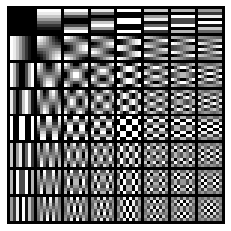

In [17]:
plt.imshow(dct_dictionary.to_img(), cmap='gray')
plt.axis('off')
plt.show()

In [18]:
# From https://stackoverflow.com/questions/16856788/slice-2d-array-into-smaller-2d-arrays
def blockshaped(arr_raw, nrows, ncols):
    """
    Return an array of shape (n, nrows, ncols) where
    n * nrows * ncols = arr.size

    If arr is a 2D array, the returned array should look like n subblocks with
    each subblock preserving the "physical" layout of arr.
    """
    arr = np.array(arr_raw)
    h, w = arr.shape
    assert h % nrows == 0, "{} rows is not evenly divisble by {}".format(h, nrows)
    assert w % ncols == 0, "{} cols is not evenly divisble by {}".format(w, ncols)
    return (arr.reshape(h//nrows, nrows, -1, ncols)
               .swapaxes(1,2)
               .reshape(-1, nrows, ncols))

In [19]:
pattern = dct_dictionary.matrix
blockshaped(pattern, 8, 8)[0]

array([[0.        , 1.        , 1.        , 0.92387953, 1.        ,
        0.78322725, 0.70710678, 0.59945618],
       [0.        , 0.92387953, 0.70710678, 0.40054382, 0.        ,
        0.        , 0.        , 0.21677275],
       [0.        , 0.78322725, 0.29289322, 0.        , 0.        ,
        0.59945618, 1.        , 0.92387953],
       [0.        , 0.59945618, 0.        , 0.21677275, 1.        ,
        0.92387953, 0.29289322, 0.        ],
       [0.        , 0.40054382, 0.        , 0.78322725, 1.        ,
        0.07612047, 0.29289322, 1.        ],
       [0.        , 0.21677275, 0.29289322, 1.        , 0.        ,
        0.40054382, 1.        , 0.07612047],
       [0.        , 0.07612047, 0.70710678, 0.59945618, 0.        ,
        1.        , 0.        , 0.78322725],
       [0.        , 0.        , 1.        , 0.07612047, 1.        ,
        0.21677275, 0.70710678, 0.40054382]])

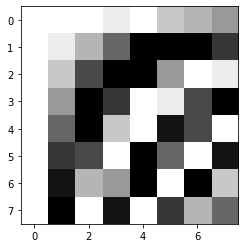

In [20]:
plt.imshow(blockshaped(pattern, 8, 8)[5], cmap='gray')

In [21]:
img = dct_dictionary.to_img()
img.shape
# want to remove 0
# keep 1,2,3,4, 5,6,7,8
# then remove 9
# keep 10,11,12,13, 14,15,16,17
# then remove 18

(73, 73)

In [22]:
# Trimming
# https://stackoverflow.com/questions/28925267/delete-every-nth-row-or-column-in-a-matrix-using-python
# https://stackoverflow.com/questions/21922314/python-removing-every-nth-element-in-array
trimmed_row = np.delete(img, np.arange(0, img.shape[0], 9), axis=0)
trimmed_row_col = np.delete(trimmed_row, np.arange(0, img.shape[1], 9), axis=1)

In [23]:
def get_dct_pattern(u, v):
    uu = u * 8
    vv = v * 8
    return trimmed_row_col[uu:uu+7, vv:vv+7]

def show_dct_pattern(u, v):
    result = get_dct_pattern(u, v)
    plt.axis('off')
    plt.imshow(result, cmap='gray')
    return result

array([[1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047],
       [1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047],
       [1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047],
       [1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047],
       [1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047],
       [1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047],
       [1.        , 0.92387953, 0.78322725, 0.59945618, 0.40054382,
        0.21677275, 0.07612047]])

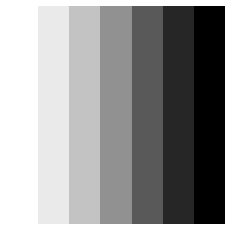

In [24]:
show_dct_pattern(1, 0)

In [25]:
def multiply_dct_pattern(pattern, val):
    # From https://stackoverflow.com/a/3823822/4162778
    (vmin, vmax) = (-1, 0) if val < 0 else (1, 0)
    cmap = 'gray_r' if val < 0 else 'gray'
    r = pattern * val
    plt.axis('off')
    plt.imshow(r, cmap=cmap, vmin=vmin, vmax=vmax)
    return r

array([[-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708],
       [-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708],
       [-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708],
       [-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708],
       [-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708],
       [-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708],
       [-0.341     , -0.31504292, -0.26708049, -0.20441456, -0.13658544,
        -0.07391951, -0.02595708]])

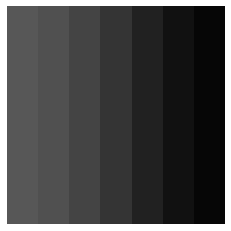

In [26]:
multiply_dct_pattern(show_dct_pattern(1, 0), -0.341)

---

### DCT II 2D from https://en.wikipedia.org/wiki/Discrete_cosine_transform#M-D_DCT-II

{\begin{aligned}X_{k_{1},k_{2}}&=\sum _{n_{1}=0}^{N_{1}-1}\left(\sum _{n_{2}=0}^{N_{2}-1}x_{n_{1},n_{2}}\cos \left[{\frac {\pi }{N_{2}}}\left(n_{2}+{\frac {1}{2}}\right)k_{2}\right]\right)\cos \left[{\frac {\pi }{N_{1}}}\left(n_{1}+{\frac {1}{2}}\right)k_{1}\right]\\&=\sum _{n_{1}=0}^{N_{1}-1}\sum _{n_{2}=0}^{N_{2}-1}x_{n_{1},n_{2}}\cos \left[{\frac {\pi }{N_{1}}}\left(n_{1}+{\frac {1}{2}}\right)k_{1}\right]\cos \left[{\frac {\pi }{N_{2}}}\left(n_{2}+{\frac {1}{2}}\right)k_{2}\right].\end{aligned}}}

The above hasn't been normalised yet, see wiki

In [27]:
# From https://github.com/chalmersgit/Discrete-Cosine-Transform/blob/master/dct.py
# https://stackoverflow.com/questions/50581120/is-it-possible-to-genereate-more-than-64-dct-basis-functions
from math import cos,sqrt,pi

def dct(x, y, u, v, n):
    # Normalisation
    def alpha(a):
        if a==0:
            return sqrt(1.0/n)
        else:
            return sqrt(2.0/n)
    return alpha(u) * alpha(v) * cos(((2*x+1)*(u*pi))/(2*n)) * cos(((2*y+1)*(v*pi))/(2*n))

def getBasisImage(u, v, n):
    # for a given (u,v), make a DCT basis image
    basisImg = np.zeros((n,n))
    for y in range(0, n):
        for x in range(0, n):
            basisImg[y,x] = dct(x, y, u, v, n)
    return basisImg

In [28]:
# So looks like DCT pattern is not actually black and white
# 0 does not mean it is black
# Same with 1 is not white, it's just a mapped value
def show_dct_pattern(u, v, n=8):
    plt.axis('off')
    arr = getBasisImage(u, v, 8)
    plt.imshow(arr, cmap='gray')
    return arr

array([[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125],
       [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]])

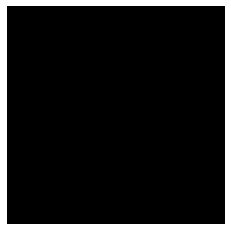

In [29]:
show_dct_pattern(0, 0)

array([[ 1.38703985,  1.38703985,  1.38703985,  1.38703985,  1.38703985,
         1.38703985,  1.38703985,  1.38703985],
       [ 1.1758756 ,  1.1758756 ,  1.1758756 ,  1.1758756 ,  1.1758756 ,
         1.1758756 ,  1.1758756 ,  1.1758756 ],
       [ 0.78569496,  0.78569496,  0.78569496,  0.78569496,  0.78569496,
         0.78569496,  0.78569496,  0.78569496],
       [ 0.27589938,  0.27589938,  0.27589938,  0.27589938,  0.27589938,
         0.27589938,  0.27589938,  0.27589938],
       [-0.27589938, -0.27589938, -0.27589938, -0.27589938, -0.27589938,
        -0.27589938, -0.27589938, -0.27589938],
       [-0.78569496, -0.78569496, -0.78569496, -0.78569496, -0.78569496,
        -0.78569496, -0.78569496, -0.78569496],
       [-1.1758756 , -1.1758756 , -1.1758756 , -1.1758756 , -1.1758756 ,
        -1.1758756 , -1.1758756 , -1.1758756 ],
       [-1.38703985, -1.38703985, -1.38703985, -1.38703985, -1.38703985,
        -1.38703985, -1.38703985, -1.38703985]])

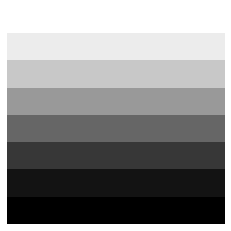

In [30]:
show_dct_pattern(0, 1) * 8

array([[ 0.00951506, -0.02709659,  0.04055292, -0.04783543,  0.04783543,
        -0.04055292,  0.02709659, -0.00951506],
       [-0.02709659,  0.07716457, -0.11548494,  0.13622378, -0.13622378,
         0.11548494, -0.07716457,  0.02709659],
       [ 0.04055292, -0.11548494,  0.17283543, -0.20387329,  0.20387329,
        -0.17283543,  0.11548494, -0.04055292],
       [-0.04783543,  0.13622378, -0.20387329,  0.24048494, -0.24048494,
         0.20387329, -0.13622378,  0.04783543],
       [ 0.04783543, -0.13622378,  0.20387329, -0.24048494,  0.24048494,
        -0.20387329,  0.13622378, -0.04783543],
       [-0.04055292,  0.11548494, -0.17283543,  0.20387329, -0.20387329,
         0.17283543, -0.11548494,  0.04055292],
       [ 0.02709659, -0.07716457,  0.11548494, -0.13622378,  0.13622378,
        -0.11548494,  0.07716457, -0.02709659],
       [-0.00951506,  0.02709659, -0.04055292,  0.04783543, -0.04783543,
         0.04055292, -0.02709659,  0.00951506]])

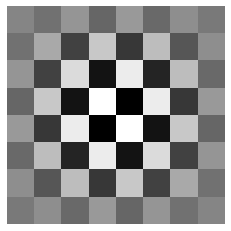

In [31]:
show_dct_pattern(7, 7)

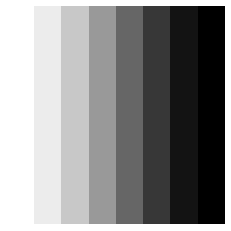

In [32]:
r = show_dct_pattern(1, 0)

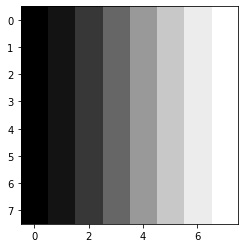

In [33]:
r2 = r * -0.341
plt.imshow(r2, cmap='gray')

# TODO

[ ] Use formula in https://en.wikipedia.org/wiki/JPEG#JPEG_codec_example